Fill in the missing code (#####) to use a NN to define a logistic regression. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
# import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

In [ ]:
#Transform the trainy and testy data into 1 and 0 labels
##### as many as needed

threshold = y.mean()  # or use median, or 0
y_binary = (y > threshold).astype(int)

trainy, testy = y_binary[:n_train], y_binary[n_train:]


/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-09 17:22:49.164728: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-07-09 17:22:49.165490: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-09 17:22:49.166274: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-09 17:22:49.166486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-09 17:22:49.166889: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created Te

Epoch 1/100


2025-07-09 17:22:49.772415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 1.3314 - val_accuracy: 0.0000e+00 - val_loss: 1.4236
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1.0391 - val_accuracy: 0.0000e+00 - val_loss: 1.1814
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.9445 - val_accuracy: 0.0000e+00 - val_loss: 0.9530
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.7463 - val_accuracy: 0.0000e+00 - val_loss: 0.7398
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.5812 - val_accuracy: 0.0000e+00 - val_loss: 0.5371
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.3942 - val_accuracy: 0.0000e+00 - val_loss: 0.3460
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.2033 - val_accuracy: 0.0000e+00 - val_loss: 0.1666
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.

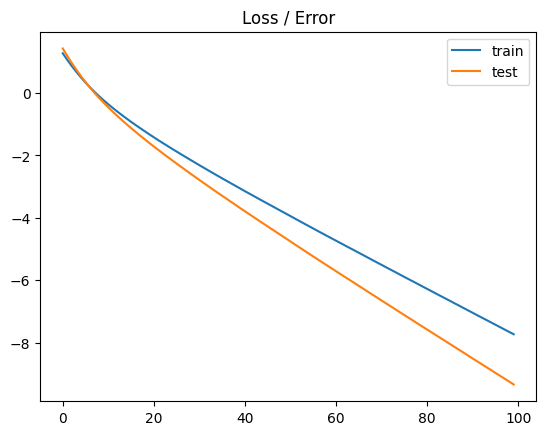

In [3]:
# logistic regression with scaled inputs outputs on the regression problem

#TODO: 
model = Sequential()
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainy, epochs=100, verbose=1, validation_data=(testX, testy))


# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e[0], test_e[0])) 
print('Train metric: %.3f, Test metric: %.3f' % (train_e[1], test_e[1])) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

For documentation see:
https://archive.ph/71Dvs 